In [11]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from IPython.display import clear_output
!pip install bdtk PyOD -q
from bdtk import BDTK
from pyod.models import loda, sos

%matplotlib inline

In [12]:
og_df = pd.read_csv("training.csv", encoding='utf8')
og_df

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,4000,362,2,20,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5656,4000,362,3,26,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5657,4000,362,4,37,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5658,4000,363,3,27,False,False,True,True,No,False,True,True,SAN ANTONiO,TX


In [13]:
og_df.describe()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity
count,5660.000000,5660.000000,5660.000000,5660.000000
mean,2500.706714,181.631449,2.504240,22.690989
std,1118.132545,104.530966,1.115276,22.281150
min,1000.000000,1.000000,1.000000,0.000000
25%,2000.000000,91.000000,2.000000,5.000000
50%,2500.000000,181.000000,3.000000,13.000000
75%,4000.000000,272.000000,3.000000,36.000000
max,4000.000000,363.000000,4.000000,184.000000


In [20]:
og_df.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State
0,1000,1,1,3,False,True,True,True,0,True,False,True,HOUSTON,TX
1,1000,1,2,5,False,True,True,True,0,True,False,True,HOUSTON,TX
2,1000,1,3,6,False,True,True,True,0,True,False,True,HOUSTON,TX
3,1000,1,4,3,False,True,True,True,0,True,False,True,HOUSTON,TX
4,1000,2,1,13,False,True,True,True,0,True,False,True,HOUSTON,TX


In [21]:

og_df = og_df.replace(to_replace= ['True','False'],value = ['1','0'])

In [23]:
df = og_df.copy()
for col_name in df.columns:
    display(pd.DataFrame(df[col_name].value_counts()))
    clear_output()

In [61]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22
#set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#set figure size
plt.rcParams['figure.figsize'] = (15, 10)

interactive(children=(Dropdown(description='base_column', options=('actual ', 'result'), value='actual '), Dro…

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

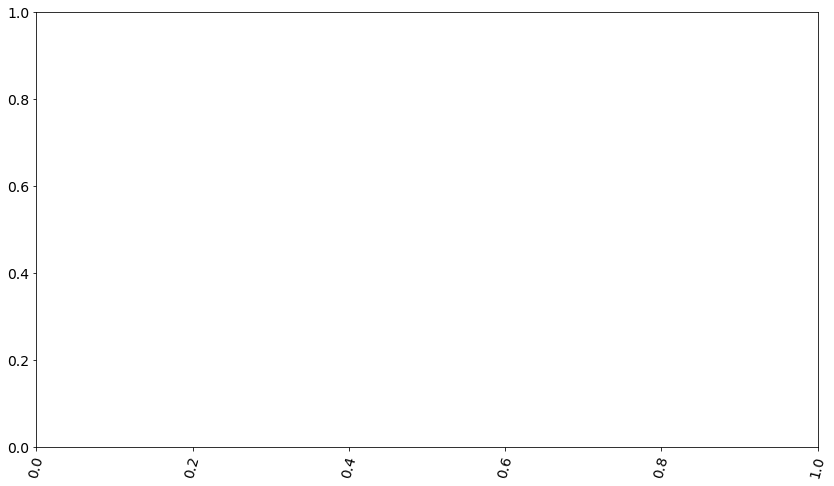

In [62]:
BDTK(df).interactive_col_dist()
plt.xticks(rotation=75)

In [26]:
amount_freq = df['GrossSoldQuantity'].value_counts()
# sns.barplot   (x=amount_freq.index.values, orient='vertical')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


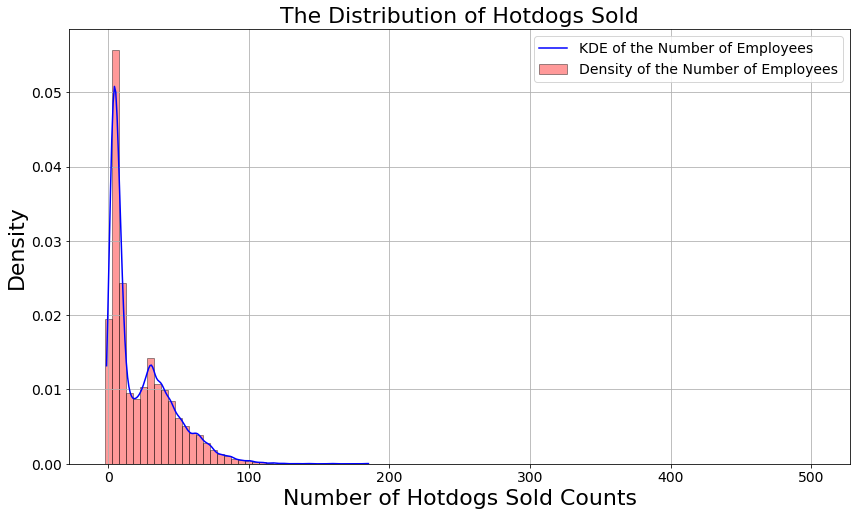

In [38]:
custom_bins = np.arange(-2.5, 502.5+1, 5)
sns.distplot(df['GrossSoldQuantity'], bins=custom_bins, 
             hist_kws={'histtype': 'bar', 'ec': 'black'}, color='red',
             kde_kws={'bw_method': 0.1, 'cut': 0.5,
                      'color': 'blue', 'label': 'KDE of the Number of Employees',},
             label='Density of the Number of Employees')
plt.title('The Distribution of Hotdogs Sold')
plt.xlabel('Number of Hotdogs Sold Counts')
plt.ylabel('Density')
plt.grid()
plt.legend()
None

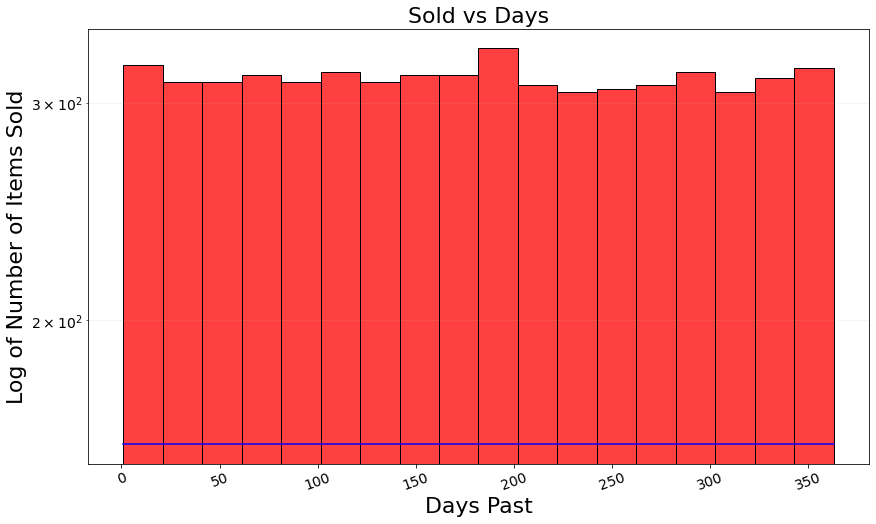

In [41]:
dates = (df['dayOfTheYear'])
sns.histplot(dates, label='PPP Loans Approved (Daily Count)', color='red')
unique_dates = np.unique(dates)
plt.plot(unique_dates, np.ones(len(unique_dates)) * (58000/365), color='blue')
plt.xticks(rotation=20)
plt.yscale('log')
plt.title('Sold vs Days')
plt.xlabel('Days Past')
plt.ylabel('Log of Number of Items Sold')
plt.grid(which='major', axis='y')
plt.grid(which='minor', axis='y', alpha=0.15)
None

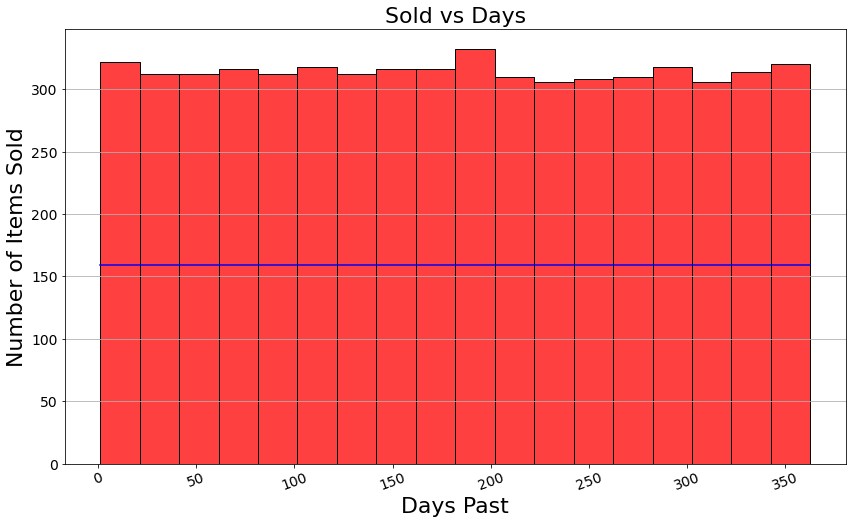

In [58]:
import sklearn
from sklearn import svm
regressor = sklearn.svm.SVC()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'actual ': y_test, 'result': y_pred})
(df)

,actual,result
4316,46,30
2892,31,5
1157,3,5
236,8,5
1340,21,5
...,...,...
468,61,5
3904,55,5
3476,6,5
926,7,5


In [55]:
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC



clf = LinearRegression()
clf.fit(X_train, y_train)
print("LinearRegression")
print(clf.predict(X_test))

clf = svm.SVR()
clf.fit(X_train, y_train)
print("SVM")
print(clf.predict(X_test))


clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print("LDA")
print(clf.predict(X_test))

LinearRegression
[44.21734606 25.93129705  0.86745015 ... 25.52495407  1.03380533
 15.84602137]
SVM
[36.12342384 13.07986937  8.91394353 ... 12.93348485  8.88777928
 12.91455227]
LDA
[42  5  5 ...  5  5  5]


In [56]:
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Gaussian")
print(clf.predict(X_test))

clf = SVC()
clf.fit(X_train, y_train)
print("SVC")
print(clf.predict(X_test))

Gaussian
[103   5   6 ...   5   5   5]
SVC
[30  5  5 ...  5  5  5]


,actual,result
4316,46,30
2892,31,5
1157,3,5
236,8,5
1340,21,5
...,...,...
468,61,5
3904,55,5
3476,6,5
926,7,5


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
X = og_df.drop(['City', 'State', 'GrossSoldQuantity'], axis=1) 
 
y = og_df['GrossSoldQuantity']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("accuracy: " + str(accuracy*100) + "%")

accuracy: 99.85689%
